In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from sqlalchemy import create_engine
import pymysql
import mysql.connector


In [31]:
data = pd.read_csv('POS Tool.csv', encoding='latin1')
data.head()

,Date,Year,Month,Quarter,Time,Order ID,Merchant Reference ID ( RRN ),Payment Method,Second Payment Method,Card Type,...,Volume (GMV),Fees,Settlement Net Amount,Net Profit,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,26-May-2024,2024,May,2,12:14:05 GMT+3,414726000261,414711140595,MASTERCARD,NaN,OFF_US,...,350.00,4.45,344.75,0.8050,NaN,NaN,NaN,NaN,NaN,NaN
1,26-May-2024,2024,May,2,00:05:11 GMT+3,414725000496,414700051156,MASTERCARD,NaN,OFF_US,...,355.00,4.51,349.68,0.8165,NaN,NaN,NaN,NaN,NaN,NaN
2,26-May-2024,2024,May,2,13:47:55 GMT+3,414726000497,414713475557,MASTERCARD,NaN,OFF_US,...,72.00,0.91,70.92,0.1656,NaN,NaN,NaN,NaN,NaN,NaN
3,26-May-2024,2024,May,2,13:54:24 GMT+3,414726000498,414713542458,MASTERCARD,NaN,OFF_US,...,85.00,1.08,83.73,0.1955,NaN,NaN,NaN,NaN,NaN,NaN
4,26-May-2024,2024,May,2,00:40:22 GMT+3,414725001140,414700402294,MASTERCARD,NaN,OFF_US,...,"3,300.00",41.91,"3,250.50",7.5900,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
drop_list = ['Second Payment Method', 'Refund Status', 'Original Amount','Original Currency', 'TotalRefundAmount','Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33']

In [34]:
data.drop(drop_list,inplace=True,axis=1)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21450 entries, 0 to 21449
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           21450 non-null  object 
 1   Year                           21450 non-null  int64  
 2   Month                          21450 non-null  object 
 3   Quarter                        21450 non-null  int64  
 4   Time                           21450 non-null  object 
 5   Order ID                       21450 non-null  int64  
 6   Merchant Reference ID ( RRN )  21450 non-null  int64  
 7   Payment Method                 21450 non-null  object 
 8   Card Type                      21450 non-null  object 
 9   Payment Type                   21450 non-null  object 
 10  Status                         21450 non-null  object 
 11  Settlement Currency            21450 non-null  object 
 12  Gross Amount                   21450 non-null 

In [ ]:
db = mysql.connector.connect(host="127.0.0.1",user='root',password = '12345',database='mydb')
cursor = db.cursor()

In [40]:
# df = pd.read_csv('fin.csv',encoding="utf-8-sig")
df = data.copy()
df = df.where(pd.notna(df), None)  
data.to_csv('fin.csv')


In [ ]:

qu1=    """
    CREATE TABLE transactions (
    Date varchar(20),
    Year INT,
    Month varchar(20),
    Quarter INT,
    Time varchar(30),
    Order_ID VARCHAR(50),
    Merchant_Reference_ID VARCHAR(50),  
    Payment_Method VARCHAR(50),
    Card_Type VARCHAR(50),
    Payment_Type VARCHAR(50),
    Status VARCHAR(100),
    Settlement_Currency VARCHAR(10),
    Gross_Amount DECIMAL(10,2),
    Net_Amount DECIMAL(10,2),
    Batch_Number VARCHAR(50),
    COGS DECIMAL(10,2),
    Settled_to_Merchant VARCHAR(3),
    Merchants_name VARCHAR(150),
    Mcc_Type VARCHAR(50),
    Volume DECIMAL(10,2),
    Fees DECIMAL(10,2),
    Settlement_Net_Amount DECIMAL(10,2),
    Net_Profit DECIMAL(10,2));
    """

cursor.execute(qu1)



In [ ]:
# Read CSV in chunks
csv_file = "fin.csv"
chunksize = 40000  # Adjust based on RAM
for chunk in pd.read_csv(csv_file, chunksize=chunksize):
    # Convert DataFrame to list of tuples
    data = [tuple(row) for row in chunk.to_numpy()]

    # SQL Query
    query = """
    INSERT INTO transactions (
        Date, Year, Month, Quarter, Time, Order_ID, Merchant_Reference_ID, 
        Payment_Method, Card_Type, Payment_Type, Status, Settlement_Currency, 
        Gross_Amount, Net_Amount, Batch_Number, COGS, Settled_to_Merchant, 
        Merchants_name, Mcc_Type, Volume, Fees, Settlement_Net_Amount, Net_Profit
    ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
    """

    # Execute batch insert
    cursor.executemany(query, data)
    db.commit()

cursor.close()
db.close()
print("CSV data uploaded successfully!")


CSV data uploaded successfully!


In [38]:
# Way One
db_user = "root"
db_password = "12345"
db_host = "127.0.0.1"
db_name = "mydb"

# Create SQLAlchemy engine
db_url = f"mysql+pymysql://{db_user}:{db_password}@{db_host}/{db_name}"
engine = create_engine(db_url)
try:
    conn = engine.connect()
    print("Connection successful!")
    conn.close()
except Exception as e:
    print(f"Connection failed: {e}")
querry1 = """
select * from transactions;
"""
data = pd.read_sql(querry1,engine)
conn.close()

Connection successful!


In [214]:
data.duplicated().sum()

0

In [215]:
data.drop_duplicates(inplace = True)

In [216]:
data.duplicated().sum()

0

In [39]:
data.head()

,Date,Year,Month,Quarter,Time,Order_ID,Merchant_Reference_ID,Payment_Method,Card_Type,Payment_Type,...,Net_Amount,Batch_Number,COGS,Settled_to_Merchant,Merchants_name,Mcc_Type,Volume,Fees,Settlement_Net_Amount,Net_Profit
0,5/26/2024,2024,May,2,12:14:05 GMT+3,414726000000.0,414711000000.0,MASTERCARD,OFF_US,Terminal,...,345.56,32,4.45,No,I Vision 1 Users,Low Ticket Size,350.0,4.45,344.75,0.81
1,5/26/2024,2024,May,2,00:05:11 GMT+3,414725000000.0,414700000000.0,MASTERCARD,OFF_US,Terminal,...,350.49,138,4.51,No,Dr Mohamed Ibrahim Pharmacy,Low Ticket Size,355.0,4.51,349.68,0.82
2,5/26/2024,2024,May,2,13:47:55 GMT+3,414726000000.0,414713000000.0,MASTERCARD,OFF_US,Terminal,...,71.09,138,0.91,No,Dr Mohamed Ibrahim Pharmacy,Low Ticket Size,72.0,0.91,70.92,0.17
3,5/26/2024,2024,May,2,13:54:24 GMT+3,414726000000.0,414714000000.0,MASTERCARD,OFF_US,Terminal,...,83.92,138,1.08,No,Dr Mohamed Ibrahim Pharmacy,Low Ticket Size,85.0,1.08,83.73,0.20
4,5/26/2024,2024,May,2,00:40:22 GMT+3,414725000000.0,414700000000.0,MASTERCARD,OFF_US,Terminal,...,3258.09,222,41.91,No,Royal Day Plaza Hotel Users,Home Appliances,3300.0,41.91,3250.50,7.59


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21450 entries, 0 to 21449
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   21450 non-null  object 
 1   Year                   21450 non-null  int64  
 2   Month                  21450 non-null  object 
 3   Quarter                21450 non-null  int64  
 4   Time                   21450 non-null  object 
 5   Order_ID               21450 non-null  object 
 6   Merchant_Reference_ID  21450 non-null  object 
 7   Payment_Method         21450 non-null  object 
 8   Card_Type              21450 non-null  object 
 9   Payment_Type           21450 non-null  object 
 10  Status                 21450 non-null  object 
 11  Settlement_Currency    21450 non-null  object 
 12  Gross_Amount           21450 non-null  float64
 13  Net_Amount             21450 non-null  float64
 14  Batch_Number           21450 non-null  object 
 15  CO

In [41]:
#[Gross Amount]-[COGS]-[Settlement Net Amount]-[Net Profit])

data['taxes'] = (data['Gross_Amount']-data['COGS']-data['Settlement_Net_Amount']-data['Net_Profit'])
data['taxes'].sum()

123.65000000034433

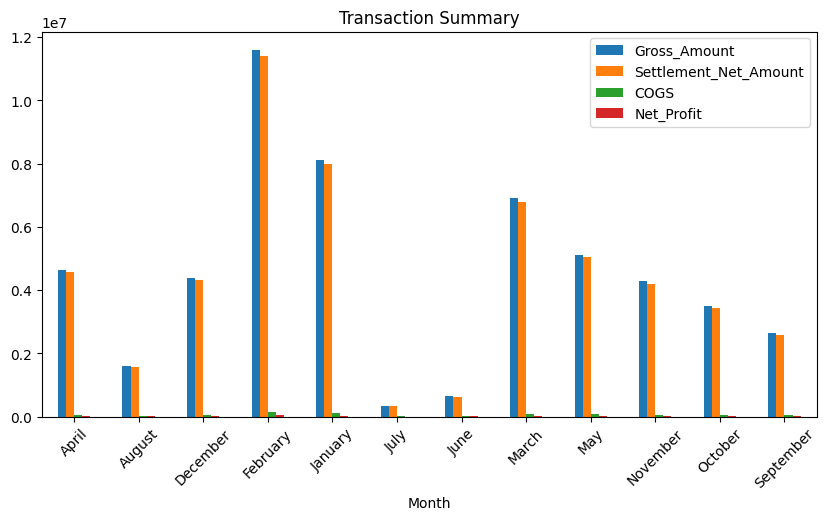

,Gross_Amount,Settlement_Net_Amount,COGS,Net_Profit
Month,,,,
April,4640718.0,4567840.33,57644.96,15222.23
August,1606572.0,1581493.46,21771.57,3309.38
December,4373813.0,4303652.33,53640.88,16513.10
February,11596366.0,11401029.02,158195.72,37114.53
January,8119096.0,7981989.08,106934.40,30141.68
July,337841.0,332527.52,5068.88,250.61
June,643056.0,631481.03,9645.86,1929.11
March,6903093.0,6786297.01,94137.45,22641.62
May,5120574.0,5036464.61,67088.32,17022.44


In [43]:
group1 = data.groupby('Month')[['Gross_Amount','Settlement_Net_Amount','COGS','Net_Profit']].sum()


group1.plot(kind ='bar',figsize=(10,5),title = "Transaction Summary")

plt.xticks(rotation = 45)
plt.show()
group1.loc['Total'] = group1.sum(numeric_only=True)
group1

C:\Users\User\AppData\Local\Temp\ipykernel_19888\820742833.py:1: FutureWarning: The provided callable <function sum at 0x000002A2829C09A0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  g2 = data.pivot_table(index='Month',values='Net_Profit',aggfunc=np.sum)


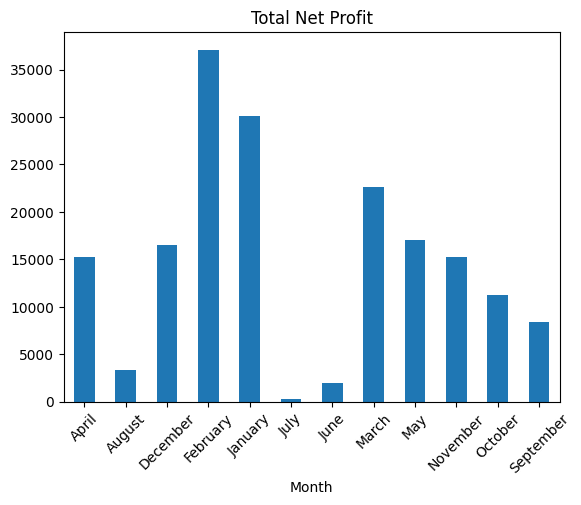

,Net_Profit
Month,
April,15222.23
August,3309.38
December,16513.10
February,37114.53
January,30141.68
July,250.61
June,1929.11
March,22641.62
May,17022.44


In [50]:
g2 = data.pivot_table(index='Month',values='Net_Profit',aggfunc=np.sum)
g2.plot(kind='bar',title='Total Net Profit',legend=False)
plt.xticks(rotation = 45)
plt.show()
g2.loc['total']= g2.sum(numeric_only=True)
g2

C:\Users\User\AppData\Local\Temp\ipykernel_23892\1757671120.py:1: FutureWarning: The provided callable <function sum at 0x0000012017630A40> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  g2 = data.pivot_table(index='Month',values='COGS',aggfunc=np.sum)


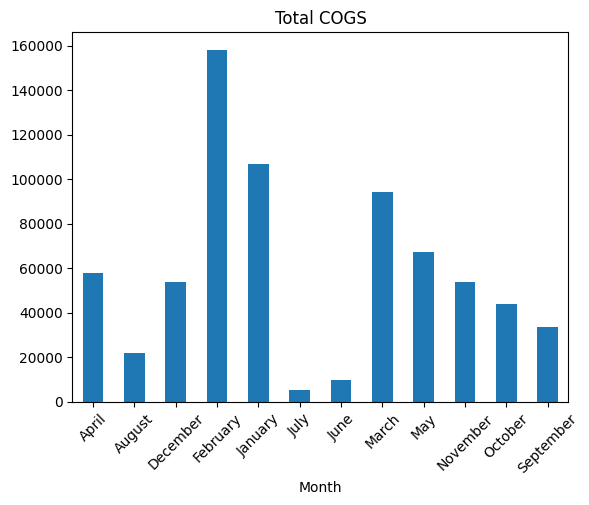

,COGS
Month,
April,57644.96
August,21771.57
December,53640.88
February,158195.72
January,106934.40
July,5068.88
June,9645.86
March,94137.45
May,67088.32


In [ ]:
g2 = data.pivot_table(index='Month',values='COGS',aggfunc=np.sum)
g2.plot(kind='bar',title='Total COGS',legend=False)
plt.xticks(rotation = 45)
plt.show()
g2.loc['total']= g2.sum(numeric_only=True)
g2

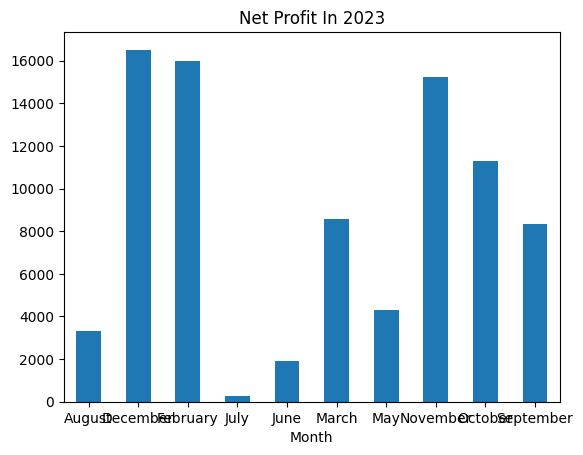

Month
August        3309.38
December     16513.07
February     15978.57
July           250.61
June          1929.11
March         8563.26
May           4324.04
November     15245.14
October      11284.46
September     8350.62
total        85748.26
Name: Net_Profit, dtype: float64

In [50]:
d = data[data['Year']==2023]
g3=d.groupby('Month')['Net_Profit'].sum()
g3.plot(kind='bar',title='Net Profit In 2023',legend=False)
plt.xticks(rotation = 0)
plt.show()
g3.loc['total']=g3.sum(numeric_only=True)
g3

C:\Users\User\AppData\Local\Temp\ipykernel_19888\3792497788.py:2: FutureWarning: The provided callable <function sum at 0x000002A2829C09A0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  g4 = g4.pivot_table(index='Month',values='Net_Profit',aggfunc=np.sum,margins=True,margins_name='Total')


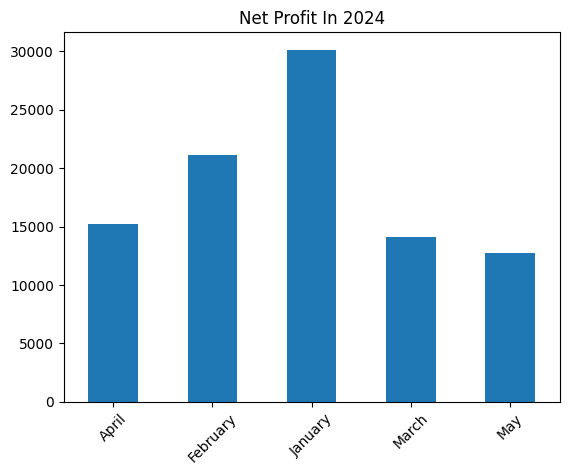

In [112]:
g4 =data[data['Year']==2024]
g4 = g4.pivot_table(index='Month',values='Net_Profit',aggfunc=np.sum,margins=True,margins_name='Total')

g4 =g4[g4.index != 'Total']
g4.plot(kind='bar',title='Net Profit In 2024',legend=False)
plt.xticks(rotation = 45)
plt.xlabel('')
plt.show()


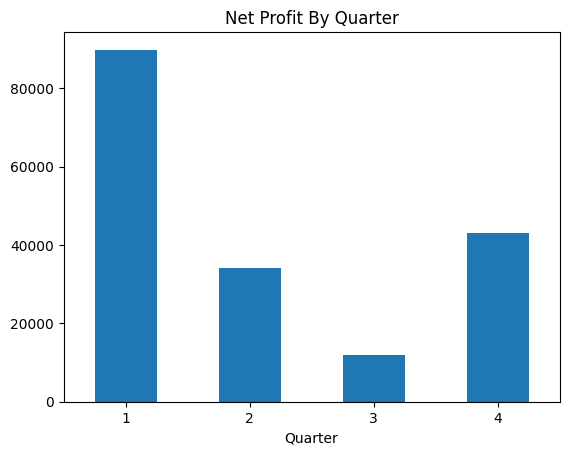

Quarter
1         89897.83
2         34173.78
3         11910.61
4         43042.70
total    179024.92
Name: Net_Profit, dtype: float64

In [53]:
g5=data.groupby('Quarter')['Net_Profit'].sum()
g5.plot(kind='bar',title='Net Profit By Quarter')
g5.loc['total']=g5.sum(numeric_only=True)
plt.xticks(rotation = 0)
plt.show()
g5

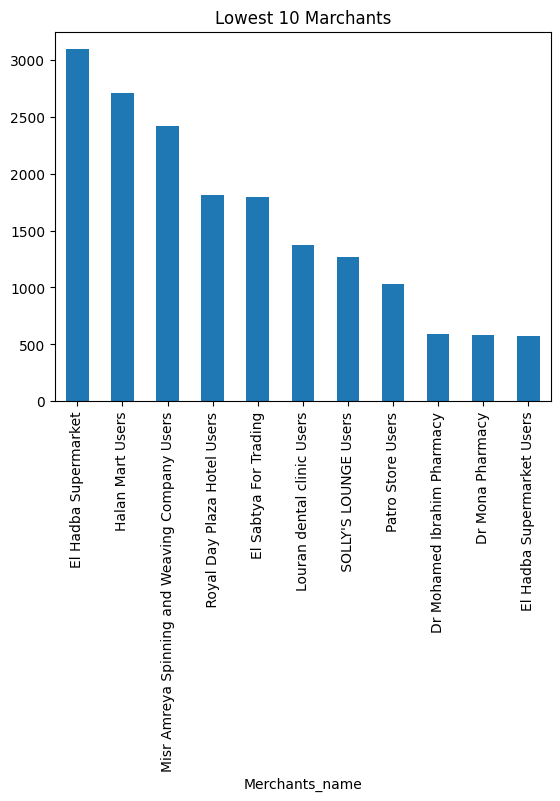

,Gross_Amount
Merchants_name,
El Hadba Supermarket,3094
Halan Mart Users,2706
Misr Amreya Spinning and Weaving Company Users,2420
Royal Day Plaza Hotel Users,1816
El Sabtya For Trading,1799
Louran dental clinic Users,1370
SOLLY'S LOUNGE Users,1265
Patro Store Users,1030
Dr Mohamed Ibrahim Pharmacy,592


In [57]:
g6=data.groupby('Merchants_name')[['Gross_Amount']].count().sort_values(ascending=False,by='Gross_Amount').head(11)
g6.plot(kind='bar',title='Lowest 10 Marchants',legend=False)
plt.xticks(rotation = 90)
plt.show()
g6.loc['total']=g6.sum(numeric_only=True)
g6.rename(columns={'Gross Amount':"Number Of Transactions"})
pd.DataFrame(g6)


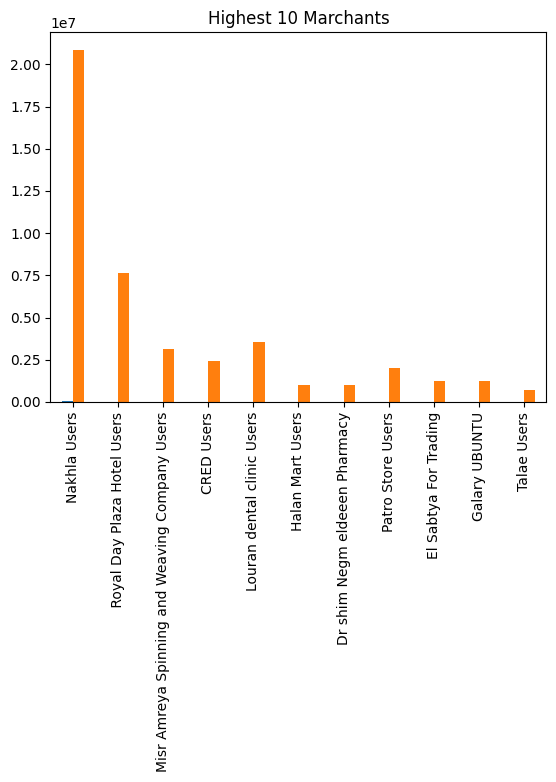

,Net_Profit,Gross_Amount
Merchants_name,,
Nakhla Users,74957.64,20856023.0
Royal Day Plaza Hotel Users,20932.49,7658164.0
Misr Amreya Spinning and Weaving Company Users,16331.78,3153167.0
CRED Users,7476.83,2443921.0
Louran dental clinic Users,6933.00,3567964.0
Halan Mart Users,6162.10,973607.0
Dr shim Negm eldeeen Pharmacy,4405.35,1024500.0
Patro Store Users,3786.03,2012219.0
El Sabtya For Trading,3710.82,1244814.0


In [59]:
g7=data.groupby('Merchants_name')[['Net_Profit','Gross_Amount']].sum().sort_values(ascending=False,by='Net_Profit').head(11)
g7.plot(kind='bar',title='Highest 10 Marchants',legend=False)
plt.xticks(rotation = 90)
plt.xlabel('')
plt.show()
g7.loc['total']=g7.sum(numeric_only=True)
pd.DataFrame(g7)

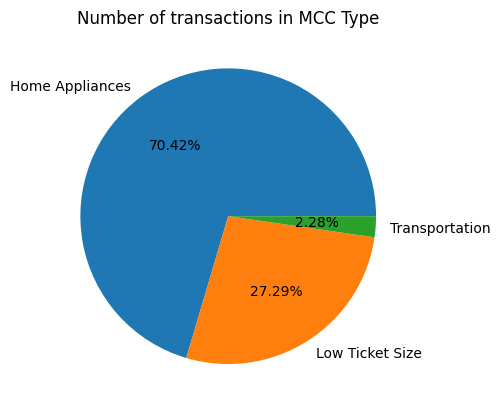

Mcc_Type
Home Appliances    15106
Low Ticket Size     5854
Transportation       490
Name: count, dtype: int64

In [ ]:
g8 = data['Mcc_Type'].value_counts()
g8.plot(kind='pie',title='Number of transactions in MCC Type',autopct='%1.2f%%')
plt.ylabel('')
plt.show()
data['Mcc_Type'].value_counts()

,Net_Profit
Mcc_Type,
Home Appliances,78348.29
Transportation,74703.02
Low Ticket Size,25973.61
total,179024.92


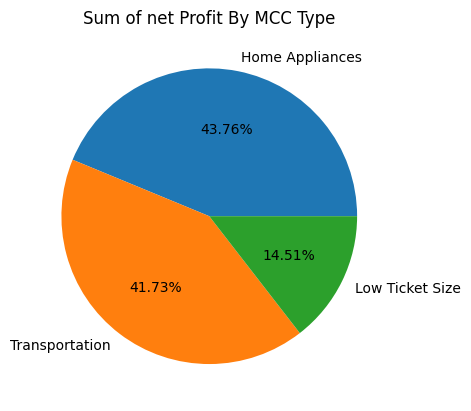

In [57]:
g9=data.groupby('Mcc_Type')['Net_Profit'].sum().sort_values(ascending=False)
g9.plot(kind='pie',title='Sum of net Profit By MCC Type',autopct='%1.2f%%')
plt.xticks(rotation = 45)
plt.ylabel('')
g9.loc['total']=g9.sum(numeric_only=True)
pd.DataFrame(g9)

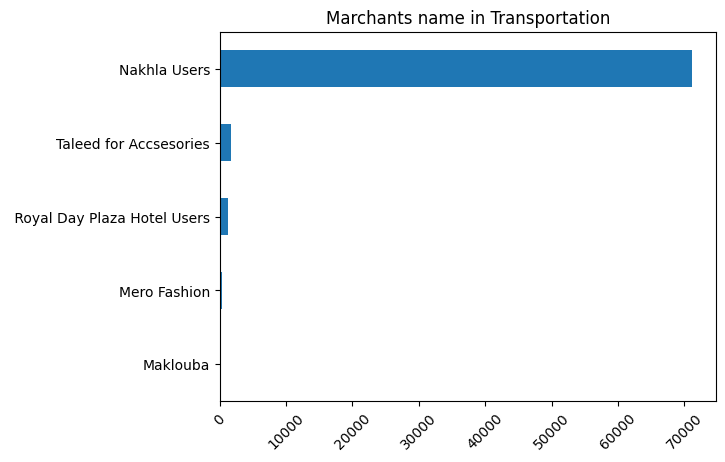

,Net_Profit
Merchants_name,
Maklouba,169.05
Mero Fashion,375.61
Royal Day Plaza Hotel Users,1259.96
Taleed for Accsesories,1714.76
Nakhla Users,71183.64
total,74703.02


In [60]:
mcc1 = data[data['Mcc_Type']=='Transportation']
g10=mcc1.groupby("Merchants_name")['Net_Profit'].sum().sort_values()
g10.plot(kind='barh',title='Marchants name in Transportation')
plt.xticks(rotation = 45)
plt.ylabel('')
plt.show()
group1.loc['total']=group1.sum(numeric_only=True)
g10.loc['total']=g10.sum(numeric_only=True)
pd.DataFrame(g10)


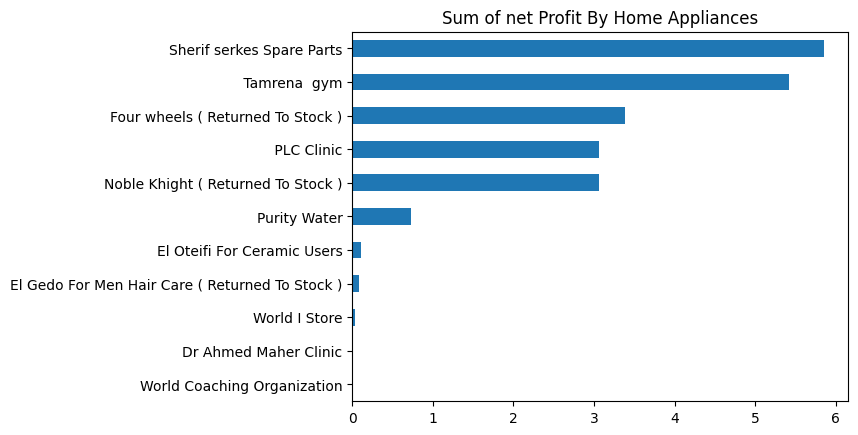

,Net_Profit
Merchants_name,
World Coaching Organization,0.00
Dr Ahmed Maher Clinic,0.01
World I Store,0.04
El Gedo For Men Hair Care ( Returned To Stock ),0.09
El Oteifi For Ceramic Users,0.11
Purity Water,0.73
Noble Khight ( Returned To Stock ),3.06
PLC Clinic,3.06
Four wheels ( Returned To Stock ),3.38


In [ ]:
mcc1 = data[data['Mcc_Type']=='Home Appliances']
g11=mcc1.groupby("Merchants_name")['Net_Profit'].sum().sort_values().head(11)
g11.plot(kind='barh',title='Lowest 10 Marchants')
plt.xticks(rotation = 0)
plt.ylabel('')
plt.show()
g11.loc['total']=g11.sum(numeric_only=True)
pd.DataFrame(g11)


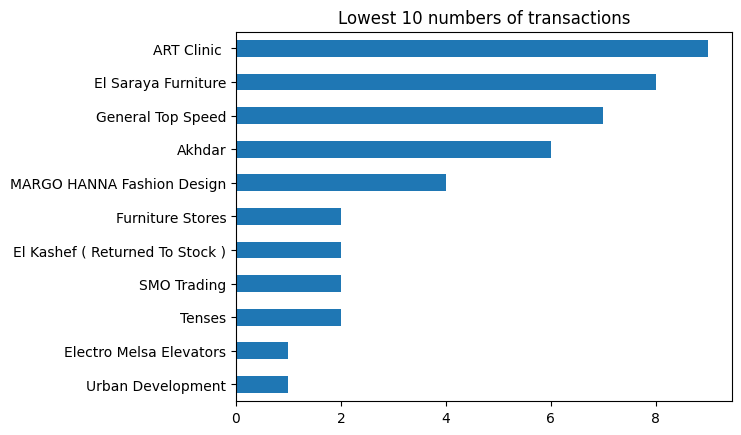

,Merchant_Reference_ID
Merchants_name,
Urban Development,1
Electro Melsa Elevators,1
Tenses,2
SMO Trading,2
El Kashef ( Returned To Stock ),2
Furniture Stores,2
MARGO HANNA Fashion Design,4
Akhdar,6
General Top Speed,7


In [63]:
mcc1 = data[data['Mcc_Type']=='Low Ticket Size']
g12=mcc1.groupby("Merchants_name")['Merchant_Reference_ID'].count().sort_values(ascending=True).head(11)
g12.plot(kind='barh',title='Lowest 10 numbers of transactions')
plt.ylabel('')
plt.show()
group1.loc['total']=group1.sum(numeric_only=True)
g12.loc['total']=g12.sum(numeric_only=True)
pd.DataFrame(g12)

In [ ]:
# sum Net profit
k=data.groupby(['Settled_to_Merchant',"Status"])['Net_Profit'].sum().sort_values(ascending=True).head(11)

k.loc['total']=k.sum(numeric_only=True)
pd.DataFrame(k)

Net_Profit
Settled_to_Merchant Status                                
No                  Authorized                       81.20
Yes                 Settled to merchant             192.57
No                  Reversed                        284.61
                    Reconciliation initiated        592.42
Yes                 Paid to merchant              36744.83
                    Paid to payment in advance   141129.29
total                                            179024.92

In [ ]:
# count transaction
k=data.groupby(['Settled_to_Merchant',"Status"])['Settlement_Net_Amount'].count().sort_values(ascending=True).head(11)

k.loc['total']=k.sum(numeric_only=True)
pd.DataFrame(k)

Settlement_Net_Amount
Settled_to_Merchant Status                                           
No                  Authorized                                     37
                    Reversed                                       91
Yes                 Settled to merchant                            91
No                  Reconciliation initiated                       94
Yes                 Paid to merchant                             1994
                    Paid to payment in advance                  19143
total                                                           21450

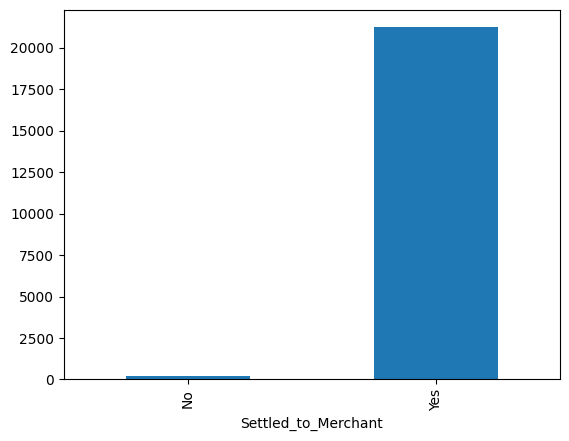

,Settlement_Net_Amount
Settled_to_Merchant,
No,222
Yes,21228
total,21450


In [63]:
g13=data.groupby(['Settled_to_Merchant'])['Settlement_Net_Amount'].count().sort_values(ascending=True).head(11)

g13.plot(kind='bar')
plt.show()
g13.loc['total']=g13.sum(numeric_only=True)
pd.DataFrame(g13)


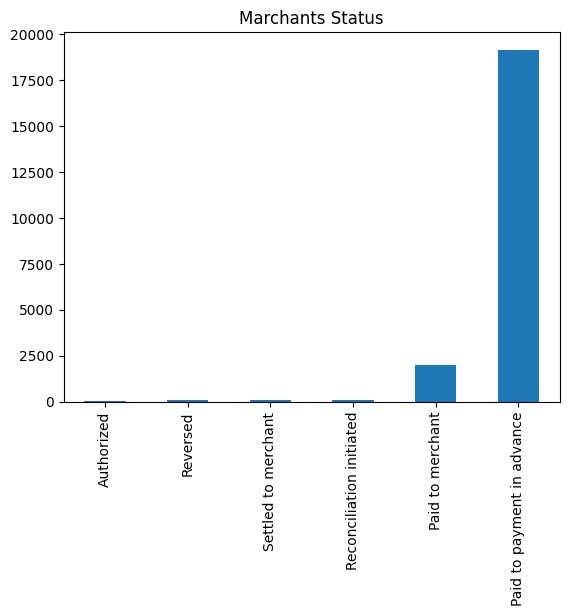

,Settlement_Net_Amount
Status,
Authorized,37
Reversed,91
Settled to merchant,91
Reconciliation initiated,94
Paid to merchant,1994
Paid to payment in advance,19143
total,21450


In [66]:
g14=data.groupby(["Status"])['Settlement_Net_Amount'].count().sort_values(ascending=True).head(11)

g14.plot(kind='bar',title='Marchants Status')
plt.xlabel('')
plt.show()
g14.loc['total']=g14.sum(numeric_only=True)
pd.DataFrame(g14)

In [205]:
d = data[data['Status']=='Authorized']
m = d.groupby(['Status'])[['Settlement_Net_Amount','Gross_Amount','Net_Profit']].sum()


In [206]:
d2 = data[data['Status']=='Paid to merchant']
m1 = d2.groupby(['Status'])[['Settlement_Net_Amount','Gross_Amount','Net_Profit']].sum()

m  = pd.concat([m,m1],axis = 0)


In [207]:
d3 = data[data['Status']=='Reversed']
m2 = d3.groupby(['Status'])[['Settlement_Net_Amount','Gross_Amount','Net_Profit']].sum()
m  = pd.concat([m,m2],axis = 0)


In [208]:
d4 = data[data['Status']=='Paid to payment in advance']
m3 = d4.groupby(['Status'])[['Settlement_Net_Amount','Gross_Amount','Net_Profit']].sum()

m  = pd.concat([m,m3],axis = 0)


In [209]:
d5 = data[data['Status']=='Reconciliation initiated']
m4 = d5.groupby(['Status'])[['Settlement_Net_Amount','Gross_Amount','Net_Profit']].sum()
m  = pd.concat([m,m4],axis = 0)


In [210]:
d6 = data[data['Status']=='Settled to merchant']
m5 = d6.groupby(['Status'])[['Settlement_Net_Amount','Gross_Amount','Net_Profit']].sum()
m  = pd.concat([m,m5],axis = 0)


In [211]:
m7 = data.groupby(['Status'])[['Merchant_Reference_ID']].count()
m7.columns= ['Number of trans']
m7 = m7.sort_index()
m7

,Number of trans
Status,
Authorized,37
Paid to merchant,1994
Paid to payment in advance,19143
Reconciliation initiated,94
Reversed,91
Settled to merchant,91


In [217]:
m =m.merge(m7,on = 'Status',how = 'right')
m

,Settlement_Net_Amount,Gross_Amount,Net_Profit,Number of trans
Status,,,,
Authorized,32190.89,32679.0,81.20,37
Paid to merchant,13348567.86,13588632.0,36744.83,1994
Paid to payment in advance,39116962.58,39755097.0,141129.29,19143
Reconciliation initiated,170207.69,172909.0,592.42,94
Reversed,121429.75,123347.0,284.61,91
Settled to merchant,68183.97,69225.0,192.57,91


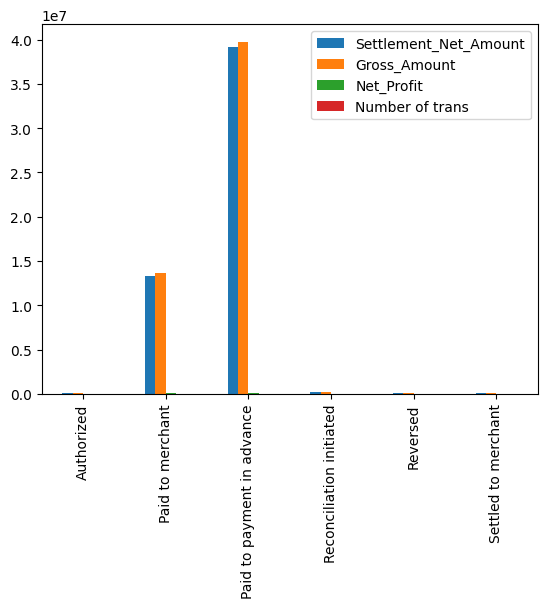

,Settlement_Net_Amount,Gross_Amount,Net_Profit,Number of trans
Authorized,32190.89,32679.0,81.20,37
Paid to merchant,13348567.86,13588632.0,36744.83,1994
Paid to payment in advance,39116962.58,39755097.0,141129.29,19143
Reconciliation initiated,170207.69,172909.0,592.42,94
Reversed,121429.75,123347.0,284.61,91
Settled to merchant,68183.97,69225.0,192.57,91


In [187]:
m.plot(kind='bar')
plt.show()
m

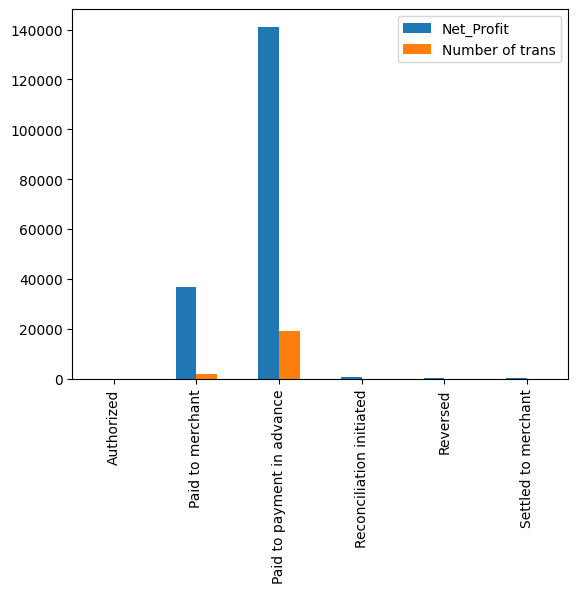

,Net_Profit,Number of trans
Authorized,81.20,37
Paid to merchant,36744.83,1994
Paid to payment in advance,141129.29,19143
Reconciliation initiated,592.42,94
Reversed,284.61,91
Settled to merchant,192.57,91


In [192]:
m.loc[:,['Net_Profit','Number of trans']].plot(kind='bar')
plt.show()
m.loc[:,['Net_Profit','Number of trans']]

In [202]:

d = data[(data['Year']==2024)&(data['Month'] == 'February')&(data['Status']=='Paid to merchant')]
k=d.groupby(["Date"])[['Gross_Amount','Net_Profit']].sum()

k.loc['total']=k.sum(numeric_only=True)
k

,Gross_Amount,Net_Profit
Date,,
2/1/2024,8100.0,24.30
2/19/2024,100.0,0.20
2/20/2024,430.0,0.00
2/21/2024,5675.0,-0.01
2/22/2024,200780.0,-40.00
2/23/2024,1450.0,-0.02
2/24/2024,1250.0,0.00
2/25/2024,22250.0,42.70
2/26/2024,1325.0,0.00


In [203]:
d = data[(data['Year']==2024)&(data['Month'] == 'February')&(data['Status']=='Paid to merchant')]
m=d.groupby(["Date"])[['Gross_Amount']].count()
m.columns = ['Number Of trans']
m.loc['total']=m.sum(numeric_only=True)
m

,Number Of trans
Date,
2/1/2024,1
2/19/2024,1
2/20/2024,2
2/21/2024,7
2/22/2024,4
2/23/2024,5
2/24/2024,1
2/25/2024,8
2/26/2024,5


In [204]:
k.merge(m,on='Date',how='right')

,Gross_Amount,Net_Profit,Number Of trans
Date,,,
2/1/2024,8100.0,24.30,1
2/19/2024,100.0,0.20,1
2/20/2024,430.0,0.00,2
2/21/2024,5675.0,-0.01,7
2/22/2024,200780.0,-40.00,4
2/23/2024,1450.0,-0.02,5
2/24/2024,1250.0,0.00,1
2/25/2024,22250.0,42.70,8
2/26/2024,1325.0,0.00,5


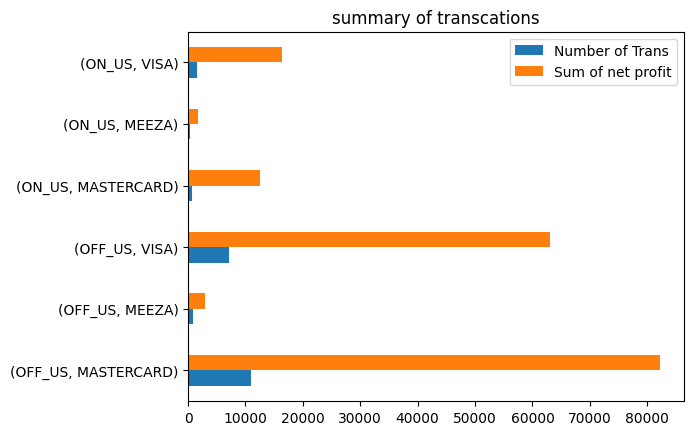

,Number of Trans,Sum of net profit
"(OFF_US, MASTERCARD)",10891.0,82301.15
"(OFF_US, MEEZA)",811.0,3018.82
"(OFF_US, VISA)",7059.0,63109.35
"(ON_US, MASTERCARD)",749.0,12513.10
"(ON_US, MEEZA)",417.0,1712.27
"(ON_US, VISA)",1523.0,16370.23
total,21450.0,179024.92


In [213]:
pivot = data.groupby(['Card_Type','Payment_Method'])['Order_ID'].count()
pivot1 = data.groupby(['Card_Type','Payment_Method'])['Net_Profit'].sum()
g15= pd.concat([pivot,pivot1],axis = 1)
g15.columns= ['Number of Trans','Sum of net profit']
g15.plot(kind='barh',title= 'summary of transcations')
plt.ylabel('')
plt.show()
g15.loc['total'] = g15.sum(numeric_only=True)


g15